# Q4 Shoulders of Giants (15 points)
As we have already seen, deep networks can sometimes be hard to optimize. Often times they heavily overfit on small training sets. Many approaches have been proposed to counter this, eg, [Krahenbuhl et al. (ICLR’16)](http://arxiv.org/pdf/1511.06856.pdf), self-supervised learning, etc. However, the most effective approach remains pre-training the network on large, well-labeled supervised datasets such as ImageNet. 

While training on the full ImageNet data is beyond the scope of this assignment, people have already trained many popular/standard models and released them online. In this task, we will initialize a ResNet-18 model with pre-trained ImageNet weights (from `torchvision`), and finetune the network for PASCAL classification.

## 4.1 Load Pre-trained Model (7 pts)
Load the pre-trained weights up to the second last layer, and initialize last layer from scratch (the very last layer that outputs the classes).

The model loading mechanism is based on names of the weights. It is easy to load pretrained models from `torchvision.models`, even when your model uses different names for weights. Please briefly explain how to load the weights correctly if the names do not match ([hint](https://discuss.pytorch.org/t/loading-weights-from-pretrained-model-with-different-module-names/11841)).

**ANSWER**

If the names of the weights do not match, then you will have to modify the key value pairs to match the layers key names by looping through them, and then load the updated state dictionary back into the model so that the names then match.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import matplotlib.pyplot as plt
%matplotlib inline

import trainer
from utils import ARGS
from simple_cnn import SimpleCNN
from voc_dataset import VOCDataset


# Pre-trained weights up to second-to-last layer
# final layers should be initialized from scratch!
class PretrainedResNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = models.resnet18(pretrained=True)
        self.model = nn.Sequential(*list(self.model.children())[:-1])
        self.flat_dim = 512
        self.fc = nn.Linear(512, 20) #NOT SURE ABOUT THIS (512, 20)
    
    def forward(self, x):
        N = x.size(0)
        x = self.model(x)
        flat_x = x.view(N, self.flat_dim)
        out = self.fc(flat_x)
        return out

Train the model with a similar hyperparameter setup as in the scratch case. No need to freeze the loaded weights. Show the learning curves (training loss, testing MAP) for 10 epochs. Please evaluate your model to calculate the MAP on the testing dataset every 100 iterations. Also feel free to tune the hyperparameters to improve performance.

**REMEMBER TO SAVE MODEL AT END OF TRAINING**

In [2]:
args = ARGS(epochs=10, batch_size=32, lr=0.0001, log_every = 250, val_every = 250, use_cuda = True)
model = PretrainedResNet()
optimizer = torch.optim.Adam(model.parameters(), lr=args.lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=args.step_size, gamma=args.gamma)
test_ap, test_map = trainer.train(args, model, optimizer, scheduler, 'ResNet_Pretrained_True')
print('test map:', test_map)

Train Epoch: 0 [0 (0%)]	Loss: 0.752044
Validation MAP =  0.07607914505368814
Train Epoch: 1 [250 (59%)]	Loss: 0.111711
Validation MAP =  0.78050062508133
Train Epoch: 3 [500 (18%)]	Loss: 0.076284
Validation MAP =  0.8090318114560286
Train Epoch: 4 [750 (78%)]	Loss: 0.083152
Validation MAP =  0.8176337533792113
Train Epoch: 6 [1000 (37%)]	Loss: 0.077908
Validation MAP =  0.8237059327119501
Train Epoch: 7 [1250 (96%)]	Loss: 0.088462
Validation MAP =  0.8267958650449495
Train Epoch: 9 [1500 (55%)]	Loss: 0.065810
Validation MAP =  0.8274384634515233
test map: 0.8208428289828065


**YOUR TENSORBOARD SCREENSHOTS HERE**

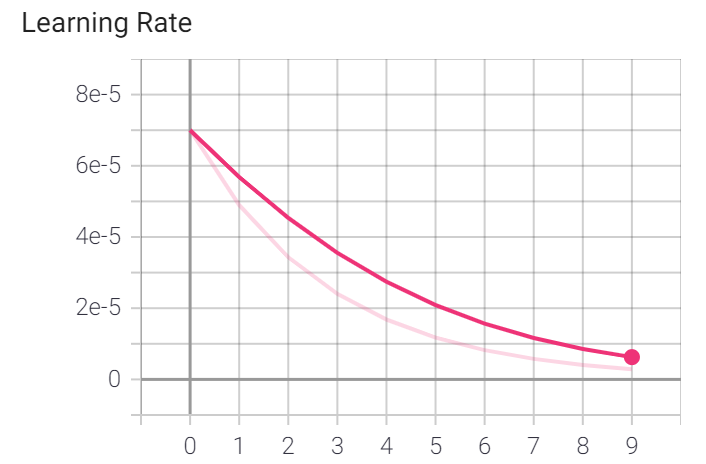

In [6]:
from IPython.display import Image
Image("./images/q4_LR.PNG")

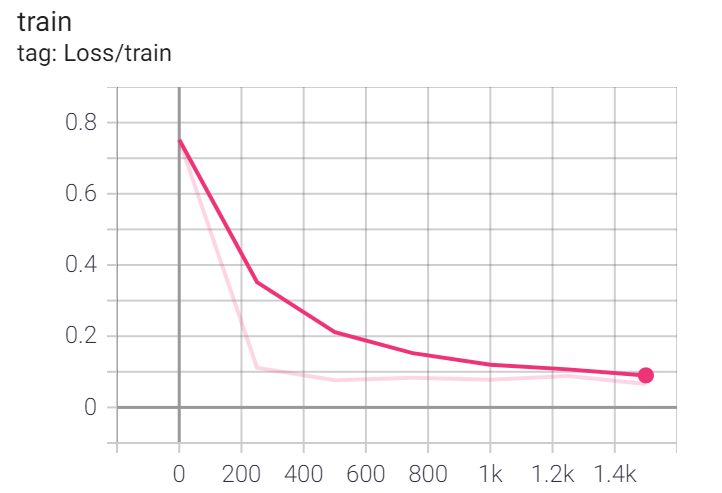

In [7]:
Image("./images/q4_train.PNG")

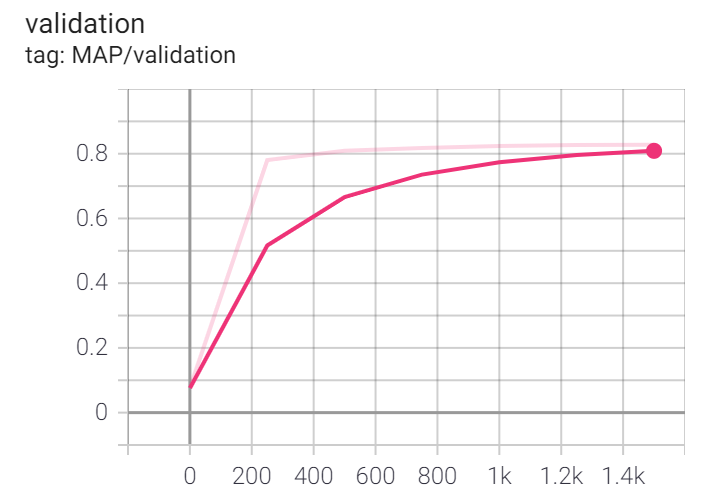

In [8]:
Image("./images/q4_validation.PNG")